# 1.載入套件 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from xgboost.sklearn import XGBClassifier

# 2.資料輸入 

Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
df = pd.read_csv('./customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cols_obj = df.select_dtypes(include='object').columns

cols_all = df.columns
print(cols_all)
print(cols_obj)

print(*[f'{col:<16}  {df[col].nunique():>4}  {list(df[col].unique())[:4]}' for col in cols_all], sep='\n')
print('\n')
print(*[f'{col:<16}  {df[col].nunique():>4}  {list(df[col].unique())[:4]}' for col in cols_obj], sep='\n')


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
customerID        7043  ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW']
gender               2  ['Female', 'Male']
SeniorCitizen        2  [0, 1]
Partner              2  ['Yes', 'No']
Dependents           2  ['No', 'Yes']
tenure              73  [1, 34, 2, 45]
PhoneService 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.1移除不必要欄位

In [5]:
df.drop(['customerID'], axis = 1, inplace=True)

## 2.2 檢查資料型態

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#check cols(object) for mix-data types
def unique_type_cnt_info(df, col):
    cnt = df[col].apply(type).nunique()
    return f'{col:<16}  {str(cnt)}'

print(*[unique_type_cnt_info(df, col) for col in df.select_dtypes(include='object').columns], sep= '\n')

gender            1
Partner           1
Dependents        1
PhoneService      1
MultipleLines     1
InternetService   1
OnlineSecurity    1
OnlineBackup      1
DeviceProtection  1
TechSupport       1
StreamingTV       1
StreamingMovies   1
Contract          1
PaperlessBilling  1
PaymentMethod     1
TotalCharges      1
Churn             1


In [8]:
cols_obj = df.select_dtypes(include='object').columns
print(*[f'{col:<16}  {df[col].nunique():>4}  {list(df[col].unique())[:4]}' for col in cols_obj], sep='\n')

gender               2  ['Female', 'Male']
Partner              2  ['Yes', 'No']
Dependents           2  ['No', 'Yes']
PhoneService         2  ['No', 'Yes']
MultipleLines        3  ['No phone service', 'No', 'Yes']
InternetService      3  ['DSL', 'Fiber optic', 'No']
OnlineSecurity       3  ['No', 'Yes', 'No internet service']
OnlineBackup         3  ['Yes', 'No', 'No internet service']
DeviceProtection     3  ['No', 'Yes', 'No internet service']
TechSupport          3  ['No', 'Yes', 'No internet service']
StreamingTV          3  ['No', 'Yes', 'No internet service']
StreamingMovies      3  ['No', 'Yes', 'No internet service']
Contract             3  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling     2  ['Yes', 'No']
PaymentMethod        4  ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
TotalCharges      6531  ['29.85', '1889.5', '108.15', '1840.75']
Churn                2  ['No', 'Yes']


In [9]:
df.loc[df['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No' 
df.loc[df['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes' 

In [10]:
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df['Churn'] = df['Churn'].astype('uint8')

In [11]:
cols_obj = df.select_dtypes(include='object').columns
df[cols_obj] = df[cols_obj].astype('category')

In [12]:
# print(*zip(*np.where(df.applymap(lambda x: x == ' '))))
# df['TotalCharges'].replace(r'^\s*$', pd.NA, regex=True, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3.空值處理

In [13]:
miss = df.isna().mean().sort_values(ascending = False)
miss[miss > 0]

TotalCharges    0.001562
dtype: float64

In [14]:
#df['TotalCharges'] = df['TotalCharges'].fillna(value = 0)
#df['TotalCharges'] = df['TotalCharges'].astype('float64')
df = df.dropna(subset = ['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

# 4.EDA 

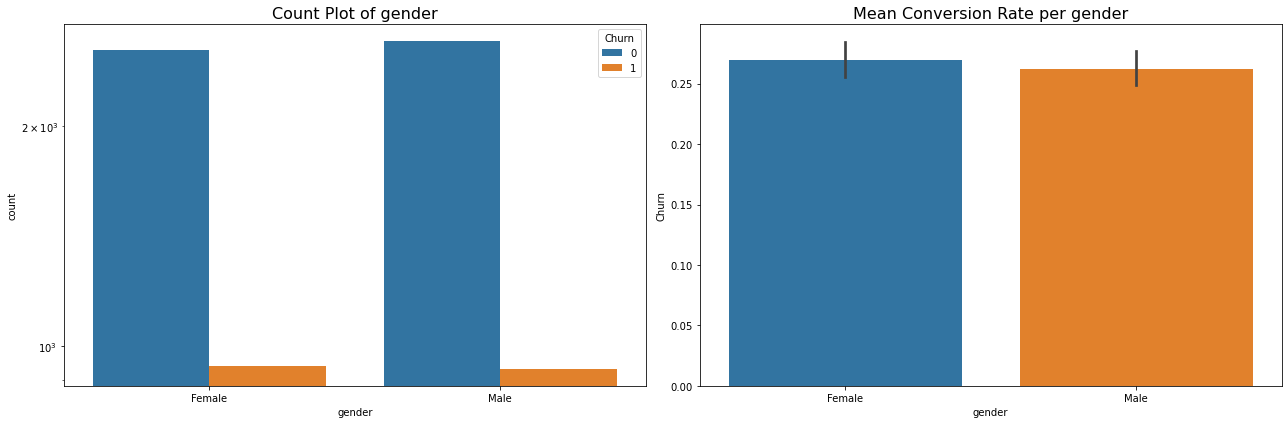

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='gender', hue='Churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of gender', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='gender', y='Churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per gender', fontsize=16)
plt.tight_layout()
plt.show()

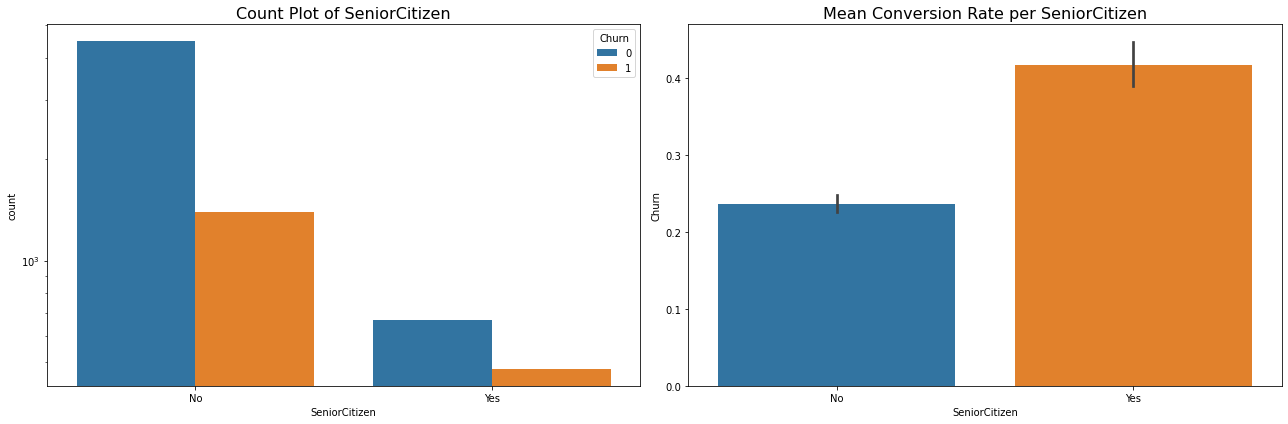

In [16]:
grouped = df[['SeniorCitizen', 'Churn']].groupby('SeniorCitizen').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=ax[0])
ax[0].set_title('Count Plot of SeniorCitizen', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='SeniorCitizen', y='Churn', data=df, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per SeniorCitizen', fontsize=16)
plt.tight_layout()
plt.show()

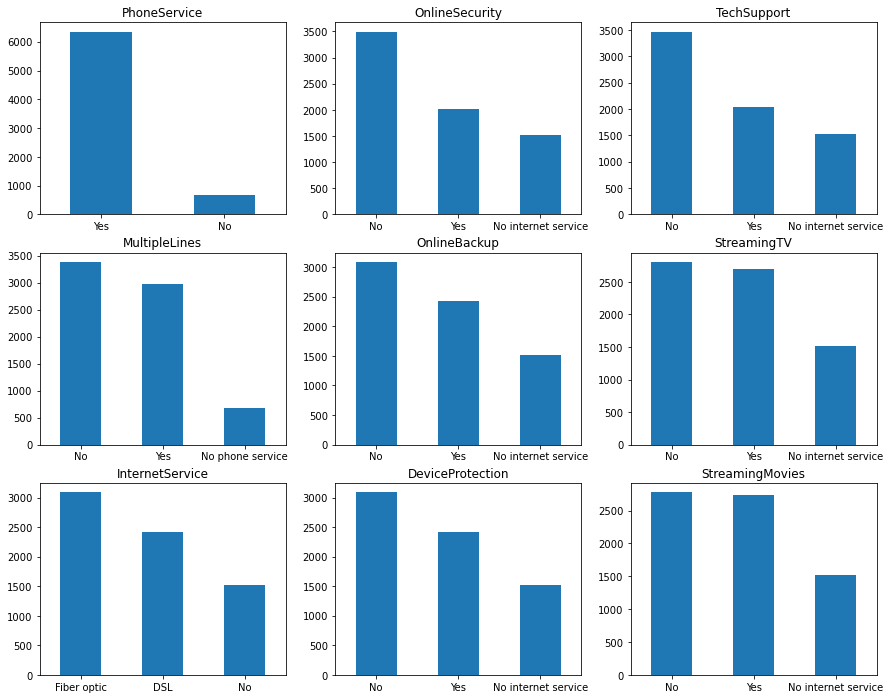

In [17]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,12))

for idx, item in enumerate(services):
    if idx < 3:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[idx, 0], rot = 0)
        
    elif idx >=3 and idx < 6:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[idx-3, 1], rot = 0)
        
    elif idx < 9:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[idx-6,2], rot = 0)
    
    ax.set_title(item)

# 4. 離群值處理

In [18]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['總數','最小值','最小值位置','25%分位數',
                    '中位數','75%分位數','均值','最大值','最大值位數','平均絕對偏差','變異數','標準差','偏度','峰度'])

In [19]:
cols_num = list(df.select_dtypes(exclude='category').columns)
cols_num.remove('Churn')
Descriptivestatistics= df[cols_num].apply(status)
Descriptivestatistics

,tenure,MonthlyCharges,TotalCharges
總數,7032.000000,7032.000000,7.032000e+03
最小值,1.000000,18.250000,1.880000e+01
最小值位置,0.000000,3719.000000,1.654000e+03
25%分位數,9.000000,35.587500,4.014500e+02
中位數,29.000000,70.350000,1.397475e+03
75%分位數,55.000000,89.862500,3.794738e+03
均值,32.421786,64.798208,2.283300e+03
最大值,72.000000,118.750000,8.684800e+03
最大值位數,28.000000,4586.000000,4.610000e+03
平均絕對偏差,21.860240,26.215380,1.899420e+03


## 4.1預測變數[Y]: 檢查是否不平衡 

In [20]:
df['Churn'].value_counts() / df.shape[0]

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [21]:
df0 = df[df['Churn']==0]

In [22]:
df1 = df[df['Churn']==1]

In [23]:
df1 = df1.sample(n=df0.shape[0], replace=True)
df = pd.concat([df0, df1])
df = df.reset_index(drop=True)

In [24]:
df['Churn'].value_counts() / df.shape[0]

0    0.5
1    0.5
Name: Churn, dtype: float64

## 4.2 自變數(數值)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

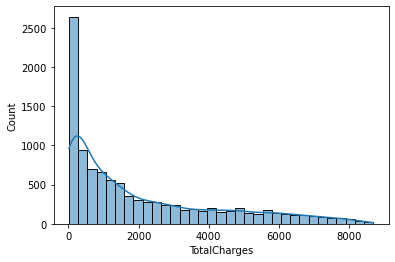

In [25]:
sns.histplot(df['TotalCharges'], kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

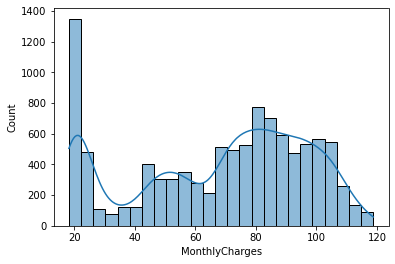

In [26]:
sns.histplot(df['MonthlyCharges'], kde=True)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

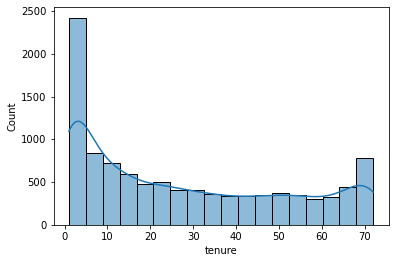

In [27]:
sns.histplot(df['tenure'], kde=True)

# 5.訓練與測試 

## 5.1前置處理

In [28]:
# Onehot encoding
# cols_cat =  df.select_dtypes(include='category').columns
# df = pd.get_dummies(df, columns=cols_cat, drop_first=True)

In [29]:
# standardization
cols_num = ['MonthlyCharges', 'TotalCharges', 'tenure']
standardScaler= StandardScaler()
df[cols_num] = standardScaler.fit_transform(df[cols_num])

In [30]:
# label encoding
enc = OrdinalEncoder(dtype='uint8')
cols_cat =  df.select_dtypes(include='category').columns
df[cols_cat] = enc.fit_transform(df[cols_cat])

##  5.2提取預測欄位

In [31]:
labels = df['Churn']
df = df.drop(['Churn'], axis = 1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=101)

In [33]:
# Over Sampling
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

## 5.3 訓練模型

### Logistic Regression 

In [34]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy is :", accuracy_lr)

Logistic Regression accuracy is : 0.755082284607938


In [35]:
lr_pred = lr_model.predict(X_test)
print(lr_pred)

[1 1 0 ... 0 0 1]


In [36]:
lr_train_score = lr_model.score(X_train, y_train)
print(lr_train_score)

0.773728813559322


In [37]:
lr_test_score = lr_model.score(X_test, y_test)
print('The Accuracy of Logistic Regression Classifier on testing set:', lr_test_score)

The Accuracy of Logistic Regression Classifier on testing set: 0.755082284607938


In [38]:
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1018
           1       0.74      0.81      0.77      1048

    accuracy                           0.76      2066
   macro avg       0.76      0.75      0.75      2066
weighted avg       0.76      0.76      0.75      2066

[[716 302]
 [204 844]]


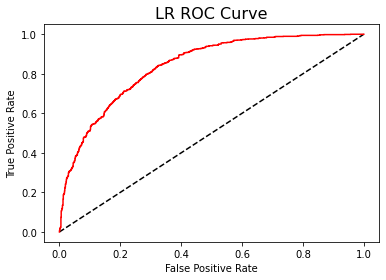

In [39]:
y_rfpred_prob = lr_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Logistic Regression', color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC Curve', fontsize=16)
plt.show();

### XGBoost

In [40]:
xgbc_model = XGBClassifier(
        n_estimators=110, 
        use_label_encoder=False,
        learning_rate= 0.3,   
        max_depth=15,          
        subsample=1,        
        gamma=0,        
        reg_lambda=1,         
        max_delta_step=0,
        colsample_bytree=1,
        min_child_weight=1,
        seed=1000)

In [41]:
xgbc_model.fit(X_train, y_train)

[18:32:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=15, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=110, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1000,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1000,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [42]:
XGB_pred = xgbc_model.predict(X_test)
print(XGB_pred)

[0 1 0 ... 0 0 0]


In [43]:
XGBtrain_score=xgbc_model.score(X_train, y_train)
print(XGBtrain_score)

0.9975786924939467


In [44]:
XGBtest_score=xgbc_model.score(X_test, y_test)
print('The Accuracy of XGBOOST Classifier on testing set:', XGBtest_score)

The Accuracy of XGBOOST Classifier on testing set: 0.8954501452081317


In [45]:
print(classification_report(y_test, XGB_pred))
print(confusion_matrix(y_test, XGB_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1018
           1       0.85      0.96      0.90      1048

    accuracy                           0.90      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.90      0.89      2066

[[ 848  170]
 [  46 1002]]


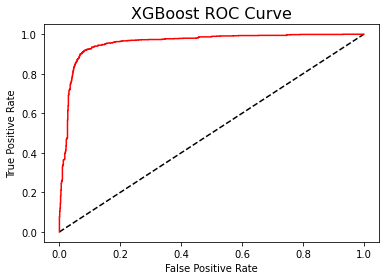

In [46]:
y_rfpred_prob = xgbc_model.predict_proba(X_test.values)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='XGBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve',fontsize=16)
plt.show();

### RandomForest

In [47]:
model_rf = RandomForestClassifier(n_estimators= 1000 , 
                                  oob_score = True, 
                                  n_jobs = -1,
                                  random_state =50,
                                  max_features = "auto",
                                  max_leaf_nodes = 50,
                                  max_depth=30
                                 )




In [48]:
model_rf.fit(X_train.values, y_train)

RandomForestClassifier(max_depth=30, max_leaf_nodes=50, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50)

In [49]:
# Make predictions
rf_predic = model_rf.predict(X_test.values)
print (metrics.accuracy_score(y_test, rf_predic))

0.7691190706679574


In [50]:
rftest_score = model_rf.score(X_test.values,y_test)
print('The Accuracy of RandomForest Classifier on testing set:', rftest_score)

The Accuracy of RandomForest Classifier on testing set: 0.7691190706679574


In [51]:
print(classification_report(y_test, rf_predic))
print(confusion_matrix(y_test, rf_predic))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1018
           1       0.76      0.81      0.78      1048

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

[[744 274]
 [203 845]]


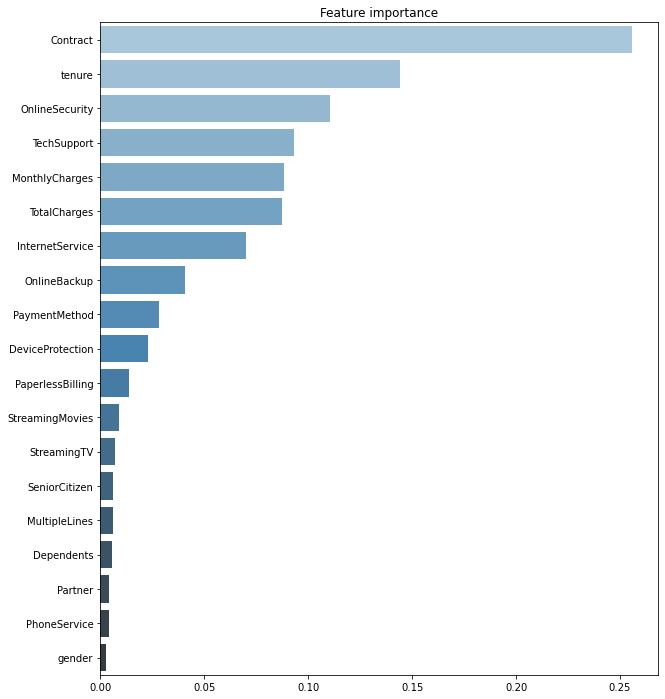

In [52]:
imp = pd.Series(data=model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

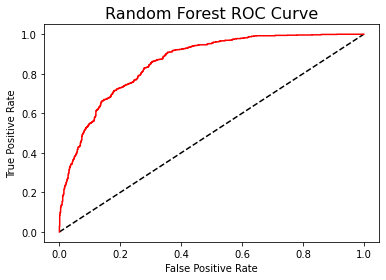

In [53]:
y_rfpred_prob = model_rf.predict_proba(X_test.values)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

# ExtraTrees

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
ETreec = ExtraTreesClassifier(max_depth=15,n_estimators=100,criterion='gini')

In [55]:
ETreec.fit(X_train, y_train)
ETree_pred=ETreec.predict(X_test)
print(ETree_pred)

[0 0 0 ... 0 0 0]


In [56]:
ETreetrain_score=ETreec.score(X_train, y_train)
print(ETreetrain_score)

0.9720338983050848


In [57]:
ETreetest_score=ETreec.score(X_test,y_test)
print('The Accuracy of ExtraTrees Classifier on testing set:', ETreetest_score)


The Accuracy of ExtraTrees Classifier on testing set: 0.8925459825750242


In [58]:
print(classification_report(y_test,ETree_pred))
print(confusion_matrix(y_test,ETree_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      1018
           1       0.86      0.94      0.90      1048

    accuracy                           0.89      2066
   macro avg       0.90      0.89      0.89      2066
weighted avg       0.90      0.89      0.89      2066

[[854 164]
 [ 58 990]]
